In [ ]:
import pandas as pd
import numpy as np


In [ ]:

dff= pd.read_csv('/content/drive/My Drive/Projects/Lending Club/loan.csv',low_memory=True).sample(frac=0.20)
df=dff.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
###seprating columns based on integer/float or object. This can help us in feature engineering process
treat_num=[]
treat_cat=[]
for i in df.columns:
  if (df[i].dtypes==np.float64) or (df[i].dtypes==np.int64) or (df[i].dtypes==np.int32) or (df[i].dtypes==np.float32):
    treat_num.append(i)
  else:
    treat_cat.append(i)

In [ ]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id','member_id','emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [ ]:
#### range most of the loans which are issues
df.groupby(by='loan_amount').size().sort_values(ascending=False).head()

loan_amount
10000    37654
20000    26214
15000    24527
12000    24404
35000    17046
dtype: int64

In [ ]:
## we can see that most of the loan amounts issues are in range 10000-20000

In [ ]:
##i took 20% of the random sample and it looks like Mar-2016 has most number of loans that are issued
df.groupby(by='issue_d').size().sort_values(ascending=False).head()

issue_d
Mar-2016    12421
Oct-2015     9777
May-2018     9348
Aug-2018     9330
Jul-2015     9226
dtype: int64

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Investor Funds')

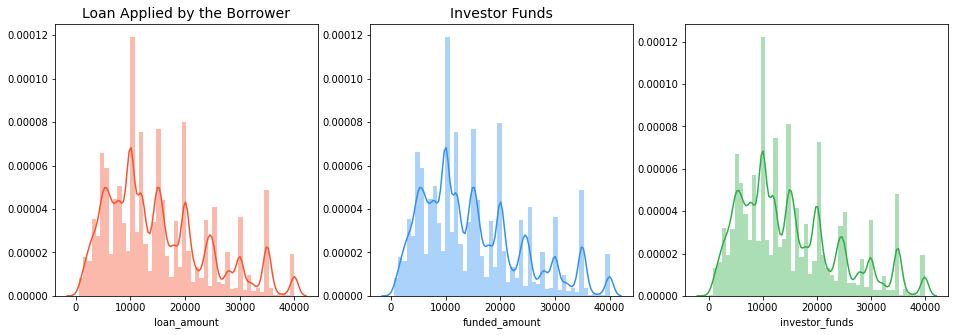

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,3,figsize=(16,5))
sns.distplot(df['loan_amount'],ax=ax[0],color='#F7522F')
ax[0].set_title('Loan Applied by the Borrower',fontsize=14)
sns.distplot(df['funded_amount'],ax=ax[1],color='#2F8FF7')
ax[1].set_title('Amount Funded',fontsize=14)
sns.distplot(df['investor_funds'],ax=ax[2],color='#2EAD46')
ax[1].set_title('Investor Funds',fontsize=14)

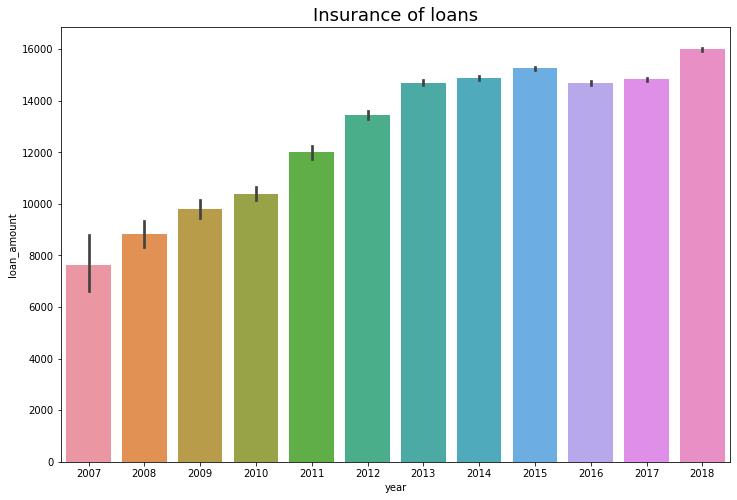

In [ ]:
###isssue date

df_series= pd.to_datetime(df['issue_d'])
df['year']=df_series.dt.year

plt.figure(figsize=(12,8))
sns.barplot('year','loan_amount',data=df)
plt.title('Insurance of loans',fontsize=18)
plt.show()

In [ ]:
df['loan_status'].value_counts()

Fully Paid                                             208218
Current                                                184341
Charged Off                                             52250
Late (31-120 days)                                       4279
In Grace Period                                          1767
Late (16-30 days)                                         732
Does not meet the credit policy. Status:Fully Paid        401
Does not meet the credit policy. Status:Charged Off       140
Default                                                     6
Name: loan_status, dtype: int64

In [ ]:
###Determining the bad loan columns

bad_loan= ['charged off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']
df['loan_condition']= np.nan

def loan_condition(status):

  if status in bad_loan:
    return 'Bad Loan'
  else:
    return 'Good Loan'

df['loan_condition']= df['loan_status'].apply(loan_condition)

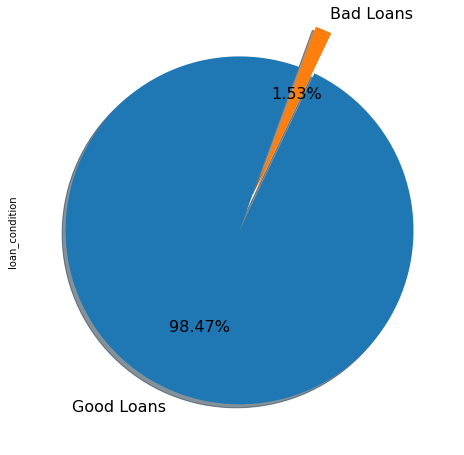

In [ ]:
labels ="Good Loans", "Bad Loans"

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, fontsize=16, startangle=70,figsize=(16,8))



In [ ]:
df['loan_condition'].value_counts()

Good Loan    445216
Bad Loan       6918
Name: loan_condition, dtype: int64

In [ ]:
df['loan_condition_int']=np.nan
df['loan_condition_int']=df.loan_condition_int.reset_index(drop=True)

In [ ]:

lst = [df]
#df['loan_condition_int'] = np.nan
a=[]
b=[]
for col in lst:
  col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 0
  col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 1

#  col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 
    
# Convert from float to int the column (This is our label)  
df['loan_condition_int']=df['loan_condition_int'].astype(int)

In [ ]:
df.loan_condition_int.value_counts()

1    445216
0      6918
Name: loan_condition_int, dtype: int64

In [ ]:
####loan amount by region


# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)





In [ ]:
issues_by_year=df.groupby(['year', 'region']).sum()['loan_amount']

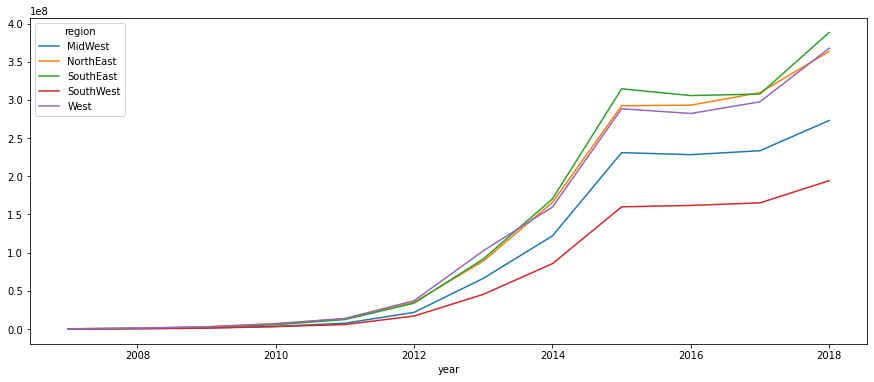

In [ ]:
issues_by_year.unstack().plot(stacked=False,  grid=False, legend=True, figsize=(15,6))

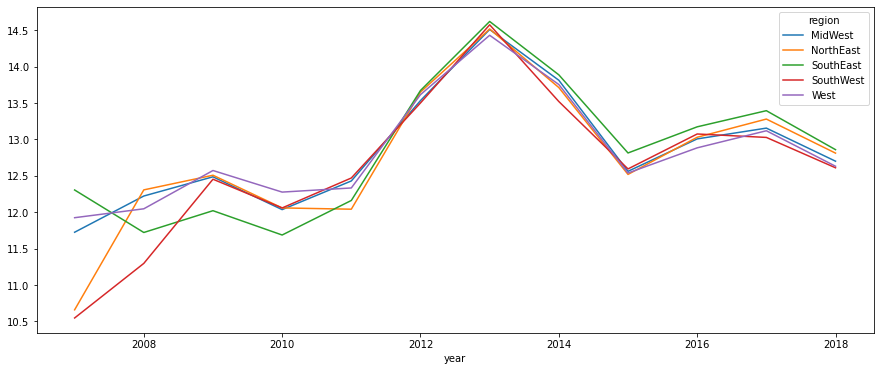

In [ ]:
###avg interest rate by region

avg_interest_rate=df.groupby(['year','region']).interest_rate.mean()
avg_interest_rate.unstack().plot(stacked=False,  grid=False, legend=True, figsize=(15,6))

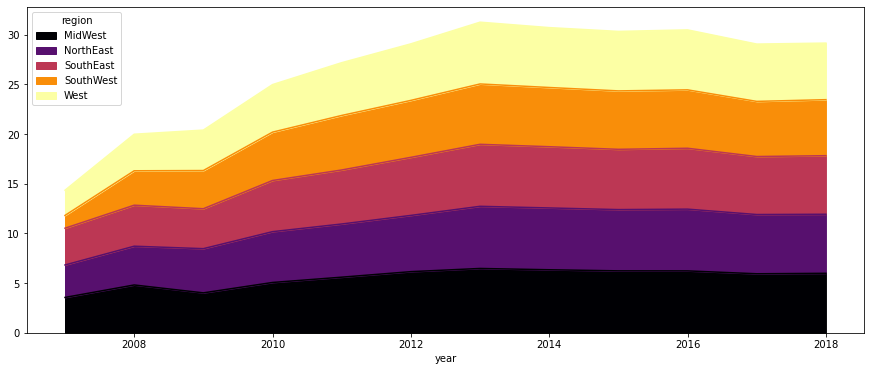

In [ ]:
##avg employement length by region

df['emp_length_int'] = np.nan
lst=[df]
for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0


emp_leng=df.groupby(['year','region']).emp_length_int.mean()
emp_leng.unstack().plot(kind='area',stacked=True,  grid=False, legend=True, figsize=(15,6),colormap=plt.cm.inferno)

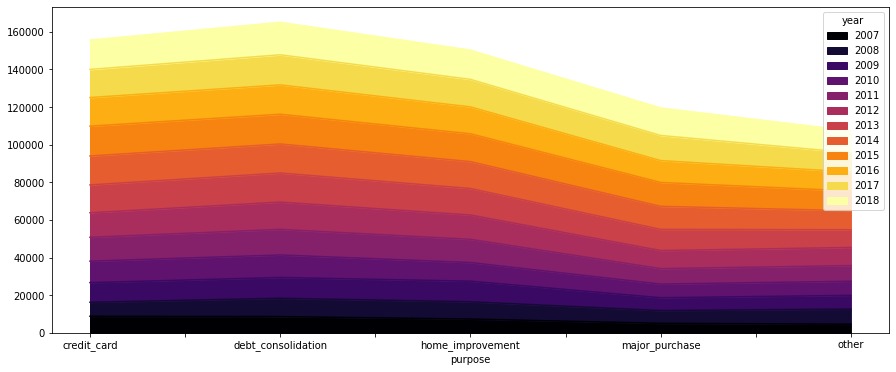

In [ ]:
##type of loan with average amount according to year

type_loan=df.groupby(['purpose','year']).loan_amount.mean().loc[['debt_consolidation','credit_card','home_improvement','other','major_purchase' ]]
type_loan.unstack().plot(kind='area',stacked=True,  grid=False, legend=True, figsize=(15,6),colormap=plt.cm.inferno)

#### We can see that there is a large number of credit card loans have been taken in all the years followed by debt_con and home_imporvement

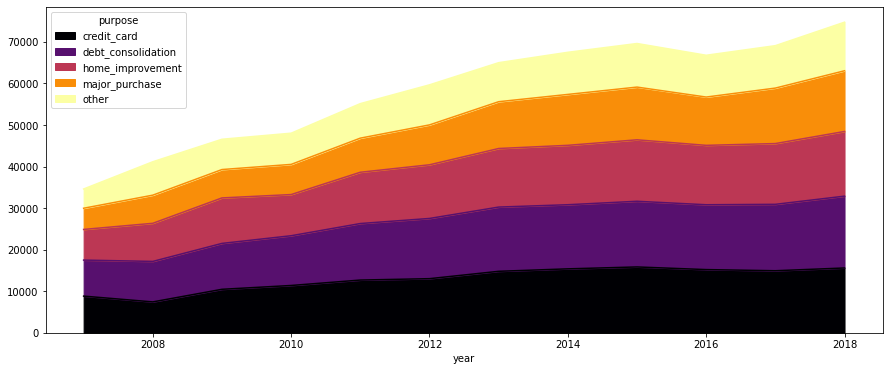

In [ ]:
l1=['debt_consolidation','credit_card','home_improvement','other','major_purchase']

df1=df.loc[df['purpose'].isin(l1)]
type_loan=df1.groupby(['year','purpose']).loan_amount.mean()
type_loan.unstack().plot(kind='area',stacked=True,  grid=False, legend=True, figsize=(15,6),colormap=plt.cm.inferno)

In [ ]:
#####highested amount of loan issues by state
df.groupby(by=['year','addr_state']).loan_amount.sum().sort_values(ascending=False).head(10)

###We can see that from 2016 California is the state where we had a minimum loan followed by Texas and Nevada in 2018

year  addr_state
2018  CA            220306750
2017  CA            181553425
2015  CA            176331425
2016  CA            173844975
2018  TX            135584350
      NY            124065300
      FL            116973050
2017  TX            114685750
2016  TX            114191000
2015  TX            111237750
Name: loan_amount, dtype: int64

In [ ]:
####### we will see in which states we have the higher operational activity
### we are trying to find the state who has decent risk

In [ ]:
by_loan_amount= df.groupby(['region','addr_state'],as_index=False).loan_amount.sum()

In [ ]:
by_interest_rate= df.groupby(['region','addr_state'],as_index=False).interest_rate.mean()
by_income_rate= df.groupby(['region','addr_state'],as_index=False).annual_income.mean()

In [ ]:
by_loan_amount.head()

,region,addr_state,loan_amount
0,MidWest,IL,283520625
1,MidWest,IN,108216700
2,MidWest,KS,59141350
3,MidWest,MI,170631150
4,MidWest,MN,116190800


In [ ]:
by_income_rate.head()

,region,addr_state,annual_income
0,MidWest,IL,80630.392173
1,MidWest,IN,71491.148296
2,MidWest,KS,72074.889031
3,MidWest,MI,71312.334041
4,MidWest,MN,73480.635969


In [ ]:
by_income_rate.head()

,region,addr_state,annual_income
0,MidWest,IL,80630.392173
1,MidWest,IN,71491.148296
2,MidWest,KS,72074.889031
3,MidWest,MI,71312.334041
4,MidWest,MN,73480.635969


We are using **OrderedDic** as a framework to put the data in order which helps while joining it. 

In [ ]:
###take the values to a list for a visualization purpose

states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income_rate['annual_income'].values.tolist()


from collections import OrderedDict

metrics_data= OrderedDict([('state_codes',states),('issues_loans',average_loan_amounts),('interest_rate',average_interest_rates),('annual_income',average_annual_income)])
metrics_df= pd.DataFrame.from_dict(metrics_data)

metrics_df.head()

,state_codes,issues_loans,interest_rate,annual_income
0,IL,283520625,12.963647,80630.392173
1,IN,108216700,13.115495,71491.148296
2,KS,59141350,12.965988,72074.889031
3,MI,170631150,13.191525,71312.334041
4,MN,116190800,12.946597,73480.635969


In [ ]:
 ######Importance of the credit score

###We can see that low grade mean hight amount plus higher interest rate 

In [ ]:
df.grade.value_counts()

B    132779
C    130018
A     86849
D     64461
E     27239
F      8356
G      2432
Name: grade, dtype: int64

In [ ]:
df.groupby('grade').loan_amount.mean()

grade
A    14622.152817
B    14144.217647
C    15007.273224
D    15687.661144
E    17498.059767
F    19018.070847
G    20192.968750
Name: loan_amount, dtype: float64

In [ ]:
df.groupby('grade').interest_rate.mean()

grade
A     7.087188
B    10.671956
C    14.147564
D    18.153819
E    21.819709
F    25.442052
G    28.124350
Name: interest_rate, dtype: float64

In [ ]:
#### grades affecting loan amount and interest rate by year

print('loan amount by year',df.groupby(['grade','year']).loan_amount.mean())
print('interest rate by year',df.groupby(['grade','year']).interest_rate.mean())

loan amount by year grade  year
A      2007     4622.916667
       2008     5993.014706
       2009     7679.527559
       2010     8579.308797
       2011     8894.405594
                   ...     
G      2014    20182.110778
       2015    20410.800439
       2016    19142.644231
       2017    20760.114778
       2018    19198.091603
Name: loan_amount, Length: 84, dtype: float64
interest rate by year grade  year
A      2007     7.696667
       2008     8.335588
       2009     8.625984
       2010     7.186499
       2011     7.122037
                 ...    
G      2014    25.823593
       2015    26.763289
       2016    28.875827
       2017    30.881679
       2018    30.814046
Name: interest_rate, Length: 84, dtype: float64


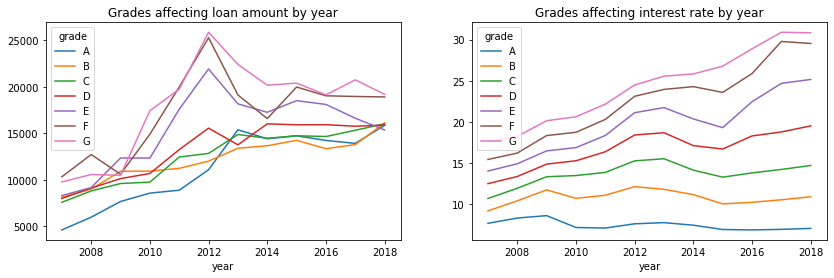

In [ ]:
f, ((ax1,ax2))=plt.subplots(1,2)
loan_amout_grade=df.groupby(['year','grade']).loan_amount.mean()
loan_amout_grade.unstack().plot(ax=ax1,grid=False, legend=True, figsize=(14,4))
ax1.set_title('Grades affecting loan amount by year',fontsize=12)
plt.ioff()

interest_rate_grade= df.groupby(['year','grade']).interest_rate.mean()
interest_rate_grade.unstack().plot(ax=ax2,grid=False, legend=True, figsize=(14,4))
ax2.set_title('Grades affecting interest rate by year',fontsize=12)
plt.ioff()

In [ ]:

df['loan_amount'].loc[(df['region']=='NorthEast') & (df['loan_status']=='Default')].values.tolist()

[8000]

In [ ]:
df['loan_amount'].loc[(df['region'] == 'NorthEast') & (df['loan_status'] == 'Default')].values.tolist()

[8000]

In [ ]:
df['loan_amount'].loc[(df['region'] == 'SouthWest') & (df['loan_status'] == 'Default')].values.tolist()

[]

In [ ]:
#########Feature Engineering

In [ ]:
###checking the percentage of missing values


df_com= df.copy()
#df_1= pd.DataFrame(df_com.isnull().mean()*100,columns=['Percentage'])
#df_com[pd.DataFrame(df_com.isnull().mean()*100)]>0

In [ ]:
#df_1= df_1.reset_index()
#df_1=df_1.rename({'index':'Column_Name'},axis=1) 

In [ ]:
#df_1[df_1['Column_Name']=='last_credit_pull_d']

We can see that there are more than 100 columns with more than 50% off the data as null. Even if we compute the data the prediciton wont be that much do.. Its better to drop those columns. 

In [ ]:
#df_1= df_1[df_1['Percentage']>0]

In [ ]:
### Let impute by either of these mean,median or mode for the column which has less null values than 20%
#df_1[df_1['Percentage']<20].sort_values(by='Percentage').reset_index(drop=True)

In [ ]:
###imputing the missing values
df_com['next_paymnt_d']=df_com.groupby("region")["next_pymnt_d"].transform(lambda x: x.fillna(x.mode))
df_com['last_pymnt_d']=df_com.groupby("region")["last_pymnt_d"].transform(lambda x: x.fillna(x.mode))
df_com["last_credit_pull_d"] = df_com.groupby("region")["last_credit_pull_d"].transform(lambda x: x.fillna(x.mode))
df_com["earliest_cr_line"] = df_com.groupby("region")["earliest_cr_line"].transform(lambda x: x.fillna(x.mode))
# # Get the mode on the number of accounts in which the client is delinquent
df_com["pub_rec"] = df_com.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))

# # Get the mean of the annual income depending in the region the client is located.
df_com["annual_income"] = df_com.groupby("region")["annual_income"].transform(lambda x: x.fillna(x.mean()))

# Get the mode of the  total number of credit lines the borrower has 
df_com["total_acc"] = df_com.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

# Mode of credit delinquencies in the past two years.
df_com["delinq_2yrs"] = df_com.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))


In [ ]:
##As of right now we are filling the 0 for na values to check the results. We will be checking in detail about them and changing them in detail.. Stay tuned.

for col in ('dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m',
           'open_il_24m', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
           'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'total_bal_il', 'tot_coll_amt',
           'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med', 'open_acc', 'inq_last_6mths',
           'verification_status_joint', 'acc_now_delinq'):
    df_com[col] = df_com[col].fillna(0)

In [ ]:
df_1= pd.DataFrame(df_com.isnull().mean()*100,columns=['Percentage'])
df_1= df_1.reset_index()
df_1=df_1.rename({'index':'Column_Name'},axis=1)
df_1= df_1[df_1['Percentage']>0]


### Let impute by either of these mean,median or mode for the column which has less null values than 20%
df_1[df_1['Percentage']<=100].sort_values(by='Percentage').reset_index(drop=True)

,Column_Name,Percentage
0,delinq_amnt,0.001548
1,tax_liens,0.005308
2,chargeoff_within_12_mths,0.007078
3,pub_rec_bankruptcies,0.060602
4,dti,0.080286
...,...,...
68,hardship_status,99.524920
69,hardship_type,99.524920
70,hardship_dpd,99.524920
71,hardship_reason,99.524920


In [ ]:
#df_com.drop(['id','member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [ ]:
df_com.drop(['issue_d', 'region', 'year', 'emp_length', 'loan_condition',
                 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                 'verification_status_joint', 'emp_length_int', 'total_rec_prncp', 'funded_amount', 'investor_funds', 
                 'sub_grade', 'loan_status', 
                 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
               'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
               'collection_recovery_fee', 'last_pymnt_amnt',
               'collections_12_mths_ex_med', 'mths_since_last_major_derog',
               'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
                'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
               'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
               'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1, inplace=True)

In [ ]:
len(df_com.columns)

95

In [ ]:
df_1= pd.DataFrame(df_com.isnull().mean()*100,columns=['Percentage'])
df_1= df_1.reset_index()
df_1=df_1.rename({'index':'Column_Name'},axis=1)
df_1= df_1[df_1['Percentage']>0]


### Let impute by either of these mean,median or mode for the column which has less null values than 20%
df1=df_1[df_1['Percentage']>50].sort_values(by='Percentage').reset_index(drop=True)

In [ ]:
df1['Column_Name'].values

array(['mths_since_recent_revol_delinq', 'mths_since_recent_bc_dlq',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_acc', 'sec_app_open_act_il',
       'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line',
       'revol_bal_joint', 'sec_app_mort_acc', 'sec_app_revol_util',
       'sec_app_mths_since_last_major_derog', 'settlement_status',
       'settlement_amount', 'settlement_date',
       'debt_settlement_flag_date', 'settlement_term',
       'settlement_percentage', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'hardship_status', 'hardship_reason', 'hardship_type',
       'hardship_amount', 'deferral_term',
       'orig_projected_additional_accrued_interest'], dtype=object)

In [ ]:
#def null_values(dff):
#        mis_val = dff.isnull().sum()
#        mis_val_percent = 100 * dff.isnull().sum() / len(dff)
#        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
#        mis_val_table_ren_columns = mis_val_table.rename(
#        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
#        mis_val_table_ren_columns = mis_val_table_ren_columns[
#            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
#        '% of Total Values', ascending=False).round(1)
#        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
#            "There are " + str(mis_val_table_ren_columns.shape[0]) +
#              " columns that have missing values.")
#        return mis_val_table_ren_columns

In [ ]:
#miss_values = null_values(dff).reset_index()
#miss_values=miss_values.rename({'index':'Column_Name'},axis=1)


In [ ]:
#miss_values[miss_values['% of Total Values']<50]['Column_Name'].values

In [ ]:
#col=['il_util', 'mths_since_rcnt_il', 'mo_sin_old_il_acct', 'bc_util',
#       'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
#       'pct_tl_nvr_dlq', 'avg_cur_bal', 'total_il_high_credit_limit',
#       'tot_hi_cred_lim', 'num_op_rev_tl', 'num_tl_op_past_12m',
#       'num_bc_tl', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
#       'num_tl_90g_dpd_24m', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
#       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
#       'mo_sin_old_rev_tl_op', 'num_il_tl', 'num_rev_accts',
#       'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_bc_sats', 'num_sats',
#       'mort_acc', 'total_bc_limit', 'total_bal_ex_mort',
#       'acc_open_past_24mths', 'last_pymnt_d', 'revol_util', 'dti',
#       'pub_rec_bankruptcies', 'collections_12_mths_ex_med',
#       'chargeoff_within_12_mths', 'tax_liens', 'last_credit_pull_d',
#       'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc',
#       'inq_last_6mths', 'earliest_cr_line', 'delinq_2yrs', 'delinq_amnt',
#       'annual_inc']



In [ ]:
for i in df1['Column_Name'].values:

  df_com.drop([i],axis=1,inplace=True)

In [ ]:
df_com.drop('next_paymnt_d',axis=1,inplace=True)

In [ ]:
df_com.shape

(452134, 61)

In [ ]:
df_com.isnull().any()

loan_amount                   False
term                          False
interest_rate                 False
installment                   False
grade                         False
                              ...  
total_il_high_credit_limit     True
hardship_flag                 False
disbursement_method           False
debt_settlement_flag          False
loan_condition_int            False
Length: 61, dtype: bool

In [ ]:
df_com['addr_state'].isnull().sum()
#print(100 * dff.isnull().sum() / len(dff))

0

In [ ]:
df_1= pd.DataFrame(df_com.isnull().mean()*100,columns=['Percentage'])
df_1= df_1.reset_index()
df_1=df_1.rename({'index':'Column_Name'},axis=1)
df_1= df_1[df_1['Percentage']>0]


### Let impute by either of these mean,median or mode for the column which has less null values than 20%
df1=df_1.sort_values(by='Percentage').reset_index(drop=True)
print(df1)

                   Column_Name  Percentage
0                  delinq_amnt    0.001548
1                    tax_liens    0.005308
2     chargeoff_within_12_mths    0.007078
3         pub_rec_bankruptcies    0.060602
4                          dti    0.080286
5            total_bal_ex_mort    2.244467
6         acc_open_past_24mths    2.244467
7               total_bc_limit    2.244467
8                     mort_acc    2.244467
9                     num_sats    2.624222
10                 num_bc_sats    2.624222
11              mo_sin_rcnt_tl    3.154817
12             tot_hi_cred_lim    3.154817
13          num_tl_op_past_12m    3.154817
14          num_tl_90g_dpd_24m    3.154817
15                num_tl_30dpd    3.154817
16       mo_sin_rcnt_rev_tl_op    3.154817
17               num_rev_accts    3.154817
18               num_op_rev_tl    3.154817
19                   num_il_tl    3.154817
20         num_rev_tl_bal_gt_0    3.154817
21             num_actv_rev_tl    3.154817
22         

In [ ]:
df_1=df_com['dti'].fillna(0)

In [ ]:
df_com['open_act_il']=df_com.open_act_il.fillna(df_com.open_act_il.median())

In [ ]:
df_1= pd.DataFrame(df_com.isnull().mean()*100,columns=['Percentage'])
df_1= df_1.reset_index()
df_1=df_1.rename({'index':'Column_Name'},axis=1)
df_1= df_1[df_1['Percentage']>0]


### Let impute by either of these mean,median or mode for the column which has less null values than 20%
df1=df_1.sort_values(by='Percentage').reset_index(drop=True)
print(df1)

                   Column_Name  Percentage
0                  delinq_amnt    0.001548
1                    tax_liens    0.005308
2     chargeoff_within_12_mths    0.007078
3         pub_rec_bankruptcies    0.060602
4                          dti    0.080286
5         acc_open_past_24mths    2.244467
6            total_bal_ex_mort    2.244467
7               total_bc_limit    2.244467
8                     mort_acc    2.244467
9                     num_sats    2.624222
10                 num_bc_sats    2.624222
11       mo_sin_rcnt_rev_tl_op    3.154817
12             tot_hi_cred_lim    3.154817
13          num_tl_op_past_12m    3.154817
14          num_tl_90g_dpd_24m    3.154817
15                num_tl_30dpd    3.154817
16              mo_sin_rcnt_tl    3.154817
17         num_rev_tl_bal_gt_0    3.154817
18               num_rev_accts    3.154817
19               num_op_rev_tl    3.154817
20  total_il_high_credit_limit    3.154817
21                   num_bc_tl    3.154817
22        m

In [ ]:
##We have left with very less % of null values. It's better to drop them.
df_com=df_com.dropna()

In [ ]:
df_com.isnull().sum().max() # Maximum number of nulls.


0

In [ ]:
df_com.columns


Index(['loan_amount', 'term', 'interest_rate', 'installment', 'grade',
       'home_ownership', 'annual_income', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_act_il',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcie

In [ ]:
####We can see from the above that we have an imbalance dataset, lets see what is the imbalance ratio we have here as we took randomly 20% of the data. But In the final run, i will be talking all the data 

df_com['loan_condition_int'].value_counts()/len(df_com['loan_condition_int'])*100

1    98.472159
0     1.527841
Name: loan_condition_int, dtype: float64

In [ ]:
df2=df_com.copy()
df2_t= df2['loan_condition_int'].values
df2= df2.drop('loan_condition_int',axis=1)
df2=df2.values

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_set, test_set in stratified.split(df2, df2_t):
    Xtrain, Xtest = df2[train_set],df2[test_set]
    ytrain, ytest = df2_t[train_set],df2_t[test_set]
    
#print('Train set ratio \n', stratified_train["loan_condition_int"].value_counts()/len(df))
#print('Test set ratio \n', stratified_test["loan_condition_int"].value_counts()/len(df))

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(286574, 60)
(71644, 60)
(286574,)
(71644,)


In [ ]:
Xtrain=pd.DataFrame(Xtrain,columns=['loan_amount', 'term', 'interest_rate', 'installment', 'grade',
       'home_ownership', 'annual_income', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_act_il',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'])

In [ ]:
###checking how well split has happened as out dataset has a problem of imbalance
import collections, numpy
print('Value counts in ytrain',collections.Counter(ytrain))
print('Value counts in ytest',collections.Counter(ytest))


Value counts in ytrain Counter({1: 282196, 0: 4378})
Value counts in ytest Counter({1: 70549, 0: 1095})


In [ ]:
import gc
gc.collect()

0

In [ ]:
Xtrain.head()

,loan_amount,term,interest_rate,installment,grade,home_ownership,annual_income,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,open_act_il,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,20000,60 months,8.67,411.98,B,MORTGAGE,96000,Source Verified,n,home_improvement,CO,3.88,0,0,0,0,10,0,62051,5.7,23,2,3,54004,17103,9.5,0,0,81,184,3,2,6,135,2,0,1,2,2,4,1,8,16,2,10,0,0,0,2,100,0,0,0,570832,62051,18900,0,N,Cash,N
1,3600,36 months,10.41,116.86,B,RENT,44000,Not Verified,n,debt_consolidation,CT,22.69,0,1,29,56,11,1,5504,30.2,31,1,2,1062,5960,18.4,0,0,181,151,2,2,0,2,2,1,3,7,5,11,3,10,28,7,10,0,0,0,1,67.7,20,0,1,26600,11677,7300,8400,N,Cash,N
2,20000,36 months,7.07,618.19,A,RENT,87500,Not Verified,n,debt_consolidation,TX,12.8,0,0,0,0,15,0,24175,25.6,29,3,5,3358,55767,30.1,0,0,87,152,21,10,0,21,15,0,5,6,8,13,7,12,22,6,15,0,0,0,1,100,0,0,0,125176,50363,79800,30576,N,Cash,N
3,5000,36 months,13.49,169.66,C,RENT,155000,Source Verified,n,debt_consolidation,PA,12.4,0,0,0,0,20,0,34400,82.6,27,10,5,3696,5074,82.4,0,0,124,175,14,14,0,14,14,0,8,10,8,10,15,10,12,10,20,0,0,0,0,100,87.5,0,0,92020,73927,37100,52120,N,Cash,N
4,22000,60 months,15.05,523.96,C,RENT,67500,Verified,n,credit_card,OR,22.2,0,0,0,77,15,1,22630,51.3,19,1,8,3200,12687,54.9,0,0,42,66,3,3,0,3,1,0,8,13,9,11,2,14,17,13,15,0,0,0,3,100,11.1,1,0,82974,48004,28100,38874,N,Cash,N


In [ ]:
###ordinal Encoding

In [ ]:
Xtrain['debt_settlement_flag'].value_counts()

N    282188
Y      4386
Name: debt_settlement_flag, dtype: int64

In [ ]:
###using different encoders which suites best on the columns.
Grade_map= { 'G':1,
            'F':2,
            'E':3,
            'D':4,
            'C':5,
            'B':6,
            'A':7
}
Xtrain['grade']=Xtrain.grade.map(Grade_map)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc_df= pd.DataFrame(enc.fit_transform(Xtrain[['home_ownership']]).toarray())
Xtrain= Xtrain.join(enc_df)

In [ ]:
columns= ['verification_status','pymnt_plan','purpose','addr_state']

for i in columns:
  Xtrain=Xtrain.join(pd.get_dummies(Xtrain[i],drop_first=True))
  #Xtrain=Xtrain.drop(i,axis=1)


In [ ]:
Xtrain['debt_settlement_flag']=pd.get_dummies(Xtrain['debt_settlement_flag'],drop_first=True)
Xtrain['term']=pd.get_dummies(Xtrain['term'],drop_first=True)

In [ ]:
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['verification_status'],drop_first=True))
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['pymnt_plan'],drop_first=True))
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['purpose'],drop_first=True))
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['addr_state'],drop_first=True))
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['hardship_flag'],drop_first=True))
#Xtrain=Xtrain.join(pd.get_dummies(Xtrain['disbursement_method'],drop_first=True))

In [ ]:
###dropping the columns which got transferred. 
Xtrain=Xtrain.drop(['disbursement_method','hardship_flag','addr_state','purpose','pymnt_plan','verification_status','home_ownership','tax_liens','chargeoff_within_12_mths','mo_sin_old_il_acct','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'],axis=1)

In [ ]:
###replicate with Xtest
Xtest=pd.DataFrame(Xtest,columns=['loan_amount', 'term', 'interest_rate', 'installment', 'grade',
       'home_ownership', 'annual_income', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_act_il',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'])

In [ ]:
Grade_map= { 'G':1,
            'F':2,
            'E':3,
            'D':4,
            'C':5,
            'B':6,
            'A':7
}
Xtest['grade']=Xtest.grade.map(Grade_map)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df= pd.DataFrame(enc.fit_transform(Xtest[['home_ownership']]).toarray())
Xtest= Xtest.join(enc_df)

In [ ]:
columns= ['verification_status','pymnt_plan','purpose','addr_state']

for i in columns:
  Xtest=Xtest.join(pd.get_dummies(Xtest[i],drop_first=True))
  #Xtest=Xtest.drop(i,axis=1)
Xtest['debt_settlement_flag']=pd.get_dummies(Xtest['debt_settlement_flag'],drop_first=True)
Xtest['term']=pd.get_dummies(Xtest['term'],drop_first=True)

In [ ]:
###dropping the columns which got transferred. 
Xtest=Xtest.drop(['disbursement_method','hardship_flag','addr_state','purpose','pymnt_plan','verification_status','home_ownership','tax_liens','chargeoff_within_12_mths','mo_sin_old_il_acct','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'],axis=1)

In [ ]:
Xtrain= Xtrain[Xtest.columns]

In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(Xtrain)
                                         
X_test_minmax= mm_scaler.transform(Xtest)


In [ ]:
np.unique(ytrain)

array([0, 1])

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train_minmax, ytrain.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (564392, 117)
After OverSampling, the shape of train_y: (564392,) 

After OverSampling, counts of label '1': 282196
After OverSampling, counts of label '0': 282196


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(C=0.0001)
lr.fit(X_train_res, y_train_res.ravel())

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr1 = LogisticRegression(C=0.0001,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

normal_ypred = lr.predict(X_test_minmax)
print(accuracy_score(ytest, normal_ypred))

0.6398861035118084


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [ ]:
confusion_matrix(ytest, normal_ypred)


array([[  642,   490],
       [23987, 46580]])

In [ ]:
print(classification_report(ytest,normal_ypred))

              precision    recall  f1-score   support

           0       0.03      0.57      0.05      1132
           1       0.99      0.66      0.79     70567

    accuracy                           0.66     71699
   macro avg       0.51      0.61      0.42     71699
weighted avg       0.97      0.66      0.78     71699



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier(max_depth=5, random_state=0)
RC.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
normal_ypred = RC.predict(X_test_minmax)
print(accuracy_score(ytest, normal_ypred))

0.5929231927920892


In [ ]:
print(classification_report(ytest,normal_ypred))

              precision    recall  f1-score   support

           0       0.02      0.52      0.04      1132
           1       0.99      0.59      0.74     70567

    accuracy                           0.59     71699
   macro avg       0.50      0.56      0.39     71699
weighted avg       0.97      0.59      0.73     71699



In [ ]:
from sklearn.utils import resample

X = pd.concat([pd.DataFrame(X_train_minmax), pd.DataFrame(ytrain,columns=['Target'])], axis=1)

Bad_Loan = X[X.Target==0]
Good_Loan = X[X.Target==1]

not_fraud_downsampled = resample(Good_Loan,
                                replace = False, # sample without replacement
                                n_samples = len(Bad_Loan), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, Bad_Loan])


In [ ]:
downsampled['Target'].value_counts()

1    4504
0    4504
Name: Target, dtype: int64

In [ ]:
ytrain=downsampled.Target

In [ ]:
Xtrain=downsampled.drop('Target',axis=1)

In [ ]:
lr = LogisticRegression()


In [ ]:
lr.fit(X_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
normal_ypred = lr.predict(X_test_minmax)


In [ ]:
print(accuracy_score(ytest, normal_ypred))

0.6155929742257965


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier(n_estimators=50,max_depth=5, random_state=0)
RC.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
normal_ypred = RC.predict(X_test_minmax)


In [ ]:
print(accuracy_score(ytest, normal_ypred))

0.651741085141437


In [ ]:
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

RC= RandomForestClassifier()
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RC, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(Xtrain, ytrain.ravel())

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 20.3min finished


In [ ]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RC= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RC.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
normal_ypred = RC.predict(X_test_minmax)


In [ ]:
print(accuracy_score(ytest, normal_ypred))

0.6537097539862053


In [ ]:
bestF.

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 100}

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val= train_test_split(X_train_res,y_train_res,test_size=0.2,random_state=123)

In [ ]:
clf = LGBMClassifier(
            nthread=4,
            n_estimators=5000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )

In [ ]:
clf.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_val,y_val)],eval_metric='auc',verbose=1000,early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[1000]	training's binary_logloss: 0.0348454	training's auc: 0.997678	valid_1's binary_logloss: 0.0382278	valid_1's auc: 0.995826
Early stopping, best iteration is:
[1723]	training's binary_logloss: 0.0308802	training's auc: 0.998684	valid_1's binary_logloss: 0.0377848	valid_1's auc: 0.995853


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.9497036, importance_type='split',
               learning_rate=0.02, max_depth=8, min_child_samples=20,
               min_child_weight=40, min_split_gain=0.0222415, n_estimators=5000,
               n_jobs=-1, nthread=4, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.04, reg_lambda=0.073, silent=-1,
               subsample=0.8715623, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

In [ ]:
normal_ypred = clf.predict(X_test_minmax)
print(accuracy_score(ytest, normal_ypred))

0.9847160962536988
